# BayesFit Documentation

If you found this module useful, please let me know on LinkedIn (https://www.linkedin.com/in/michael-slugocki-35b44190/) or GitHub (https://github.com/slugocm).  As a graduate student, all the recognition matters.  Thank you, and I hope you all enjoy! 

Within this document, we will explain how to use the BayesFit module to fit psychometric functions.  The module itself uses very few functions, but contains a wealth of functionality, fully leveraging the power of PyMC3. 

BayesFit uses MCMC sampling to obtain parameter estimates in fitting models to psychophysical data.  We encourage users to perform their own research regarding use of such sampling methods to obtain estimates for parameters of interest, as the pros and cons in using such methods for parameter estimation is beyond the scope of this tutorial. 

Without further ado, let us jump right in! 

We first import the modules we need for this example via the following lines of code:

In [2]:
# Import BayesFit module
import bayesfit as bf

# Import modules for this tutorial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Usage: Fitting model to single dataset

### Data Format

To save time, we will generate our own miniature dataset for a ficitious observer who has run in a psychophysical experiment.

In [3]:
# We will generate a ficitious set of data from an observer
x = [0.1, 0.21, 0.33, 0.44, 0.55, 0.66, 0.78, 0.9]
y = [0.48, 0.47, 0.53, 0.55, 0.73, 0.83, 0.97, 0.96] 
N = [100, 100, 100, 100, 100, 100, 100, 100]
data = np.array([x, y, N]).T

For single datasets (i.e., data from one experiment), BayesFit expects the data to be organized in a m-row by 3-column Numpy array with the following format:

Numpy.array [X (intensities), Y (proportion correct), N (Number of trials)]

The first column should correspond to the intensities used in ascending order with row number, the second column proportion of correct responses at each intensity level, and the third row the number of trials run. Values along each row for columns two and three should be in correspondence to the level of intensity secified along that row in column one.

Here is a very quick plot of the data we have just imported:

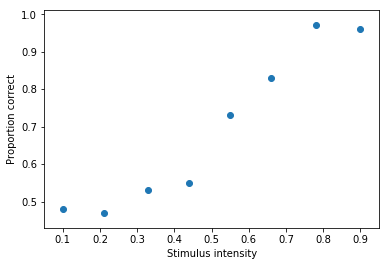

In [4]:
# Generate simple plot of data
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct')

### Fit model using BayesFit: 'fitmodel' function

Once we have our dataset appropriately organized, we are ready to fit a model using BayesFit to our data. To accomplish this, BayesFit uses one main function called **fitmodel**, where the user specifies as input all the options that they want to use when fitting a psychometric function to a dataset. BayesFit makes available to the user a variety of options to help provide the tools needed, while not bogging down the user with too many difficult decisions. Below, we describe all the options that are available to the user when fitting models to data, as well as the output variables from the fitting procedure.

In [5]:
trace, metrics, options = bf.fitmodel(data,
                                      batch=False,
                                      logspace=None,
                                      nafc=2,
                                      sigmoid_type='logistic',
                                      param_ests=None,
                                      param_constraints=None,
                                      threshold=0.75,
                                      n_samples=5000,
                                      chains=2,
                                      n_workers=1
                                      )

# All arguments, and default values assigned to each argument, 
# are displayed above. 

# Describing each input and ouput argument in turn:

# --------------------------------------------
#
# INPUT ARGUMENTS
# 
# --------------------------------------------
# 
# (1) data *mandatory*
# Value type: Numpy array or dict
# 
# This argument is simply the m-row by 3-column Numpy array corresponding
# to data from the experiment.
# --------------------------------------------
# 
# (2) batch
# Value type: Logical
# Values: True or False 
# 
# Argument specifies whether the data provided to BayesFit is meant
# to be batch fit. By default, this options is set to False, which assumes 
# that the user has provided a single Numpy array with data that they
# would like to fit a single model to. If this options is set to true, 
# then the same model options will be fit to all datasets. If batch fitting
# data, be sure to provide BayesFit with a dictionary that contains multiple
# datasets, such that each dataset has its own key. For more information on 
# how to batch fit data using BayesFit, see the tutorial for batch fitting
# below. 
# --------------------------------------------
# 
# (3) logspace
# Value type: Logical
# Values: True or False 
# 
# Informs BayesFit whether the intensities provided need to be logspaced.
# By default, BayesFit will attempt to logspace values for Weibull and 
# Log-Quick functions. Therefore, if your intensities are already logspaced,
# and you are fitting one of these function, set this options to False. 
# Otherwise, omit this argument, or set to None. If you are certain you 
# would like to logspace your intensities despite what function you fit, 
# set this argument to True.
# --------------------------------------------
# 
# (4) nafc 
# Value type: Numeric
# Values: range 1-10
# 
# Number of alternative options provided to observer when making a judgment
# during the experiment. By default, BayesFit assumes a 2AFC design, such
# that observers have two choices that they can make for their response. 
# This argument is important in fixing the guess rate when fitting a 
# psychometric function to data. 
# --------------------------------------------
# 
# (5) sigmoid_type
# Value type: String
# Values: logistic, weibull, gumbel, quick, log-quick, hyperbolic  
# 
# Defines what sigmoid function to use in modelling an observer's 
# response given a stimulus intensity. By default, a logistic function 
# is used in fitting a model to data. However, if uncertain as to which 
# function to use, it is best to fit serveral different sigmoid types 
# to data and perform comparisons between fits to see which function 
# should be used in modelling an observer's response
# --------------------------------------------
# 
# (6) param_ests
# Value type: List with numeric arguments
# Values: [alpha, beta, gamma, lambda]    (min. 2 args!)
# 
# A list of parameter estimates for the four parameters that define 
# a psychometric function. This include alpha and beta, which are typically 
# control the scale and slope parameters for functions (exceptions exist
# such as for Weibull). Gamma is the guess rate (usually 1/nafc). Lambda
# is the lapse rate, as sometimes observers get stimulus intensities of 
# large magnitude incorrect for various reasons not associated with 
# their perception of the stimulus iteself. 
# 
# If this argument is provided, the list must be of length 2 or greater, as
# both estimates for alpha and beta must be provided. By default, alpha
# will be estimated via linear regression, while beta is assigned a value 
# of 2. Gamma by default is assigned as 1/nafc. Lambda by default is 
# set to zero. 
# --------------------------------------------
# 
# (7) param_constraints
# Value type: List with logical arguments
# Values: List [alpha, beta, gamma, lambda]    (min. 2 args!)
# 
# A list indicating which parameters should be estimated versus which 
# values should remain fixed. For example, if a parameter estimate was
# provided for lambda, and the param_constraint for lambda is set to
# False, the parameter estimate specified will remain fixed at that value
# specified. 
# --------------------------------------------
# 
# (8) threshold
# Value type: Numeric
# Values: range 0 - 1
# 
# Value of proportion correct response to define threshold. This will 
# influence what threshold value is returned in the metrics['threshold'] 
# variable that is output by BayesFit upon completion of the fitting
# procedure.
# --------------------------------------------
# 
# (9) n_samples
# Value type: Numeric
# Values: value > 0
# 
# Determines the number of samples to draw per chain using the 
# MCMC algorithm. Default number of samples drawn is 5000 per chain.
# --------------------------------------------
# 
# (10) chains
# Value type: Numeric
# Values: value >= 2
# 
# Number of chains to generate when sampling. This number should always 
# be greater than 2 to allow for diagnostic tests for convergence to be 
# possible. Default value is set to 2. 
# --------------------------------------------
# 
# (11) n_workers
# Value type: Numeric
# Values: value > 0
# 
# Roughly speaking, number of CPU cores to engage when sampling. Non-Windows
# users should set this value higher than 1, but errors typically occur on 
# Windows with PyMC3 when the core limit is set to anything greater than 1.
# Therefore, the default value is set to 1.




# --------------------------------------------
#
# OUTPUT VARIABLES
# 
# --------------------------------------------
# 
# (1) Trace
# Type: PyMC3 Object
# 
# This output variable is a trace for the samples drawn for each
# parameter estimated. To access a specific parameter from a trace, 
# simply use the parameter name as a key in the trace. For example, 
# to get the trace for parameter alpha, you would type the 
# following code into the python interpreter: trace['alpha']. 
# --------------------------------------------
# 
# (2) Metrics
# Type: dict
# 
# Variable is a dictionary containing important metrics on the goodness
# of fit for each parameter estimated, along with the threshold approximated
# using the model fit defined at the threshold specified as input into
# the fitmodel function. 
# --------------------------------------------
# 
# (3) Options
# Type: dict
# 
# Returns a variable that contains all the options specified when 
# performing the fitting procedure.

C:\ProgramData\Anaconda3\lib\site-packages\bayesfit-2.0-py3.6.egg\bayesfit\bayesfit.py:109: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  response_y = np.zeros(data[i, 2])
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [lambda_logodds__]
>Metropolis: [beta]
>Metropolis: [alpha]
100%|████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:04<00:00, 1161.59it/s]
The number of effective samples is smaller than 25% for some parameters.


Congratulations!  With the simple one function above, we have not only compiled a model, but have also drawn samples to estimate the parameters of the psychometric model fit our data using PyMC3! We can also visual the fitted model using the *plot_cdf* function of BayesFit. See the section on plotting functions below for more information on this.

Easy?  Wait until you see the batch processing tutorial below! :) 

However, we are not out of the woods just yet. Because we are using an MCMC algorithm, we have evidence suggesting that our chains have converged. For more information on how to go about this procedure please see the section below titled 'Convergence Diagnostics'. 

For now, we will simply explore the output variables for completeness. 

### Output variables from 'fitmodel'

Let us now examine the output variables in turn. The first output variable is a trace of the samples drawn for each output variable.

In [6]:
print(trace)

<MultiTrace: 2 chains, 5000 iterations, 5 variables>


Let us now visualize what this trace looks like:

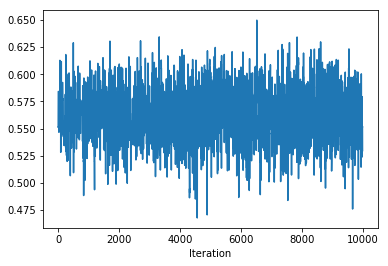

In [7]:
plt.plot(trace['alpha'])
plt.xlabel('Iteration')

Next, let us examine the metrics output by the model for each parameter.

First, to access numerical approximation of threshold obtained from our model to the data, we access the 'threshold' key in the metrics dictionary.  This would be done as so:

In [8]:
print(metrics['threshold'])

0.573327332733


We can also access metrics about the goodness-of-fit of parameters in the model. For example, to see the metrics for parameter alpha, we would type the following into the python interpreter:

In [9]:
print(metrics['alpha'])

          mean       sd  mc_error   hpd_2.5  hpd_97.5   n_eff    Rhat
alpha  0.56251  0.02302  0.000593  0.518534  0.606981  1273.0  0.9999


Last, let us print out the options that we used when performing the sampling procedure:

In [10]:
print(options)

{'batch': False, 'logspace': False, 'nafc': 2, 'sigmoid_type': 'logistic', 'param_ests': [0.46666666666666679, 3, 0.5, 0], 'param_constraints': [True, True, False, True], 'threshold': 0.75, 'n_samples': 5000, 'chains': 2, 'n_workers': 1}


## get_threshold function: extract threshold of choice

In addition to extracting a threshold via the metrics variable output, you can also extract a numerical approximation of the threshold using the model fit at any proportion correct response via the **get_threshold** function. Here is an example of its usage using variables ouput from the example above: 

In [11]:
threshold_pc = 0.70
print(bf.get_threshold(data, metrics, options, threshold_pc = threshold_pc))

0.52604260426


## Usage: Fitting model to multiple dataset (batch fitting)

Fitting models to multiple datasets is just as easy using BayesFit as it is to fit a single model. The key difference between fitting multiple models to data versus one model is how the data is organized and passed to BayesFit. 

First, each dataset should be organized in the same way as in the single usage case. In other words, each dataset should have a m-row by 3-column Numpy array with proper arrangement as described in the tutorial section above for fitting a single model to a single dataset. 

For example: 

In [12]:
# We will generate two ficitious sets of data from two different observers
# run in the same experiment

x_obs1 = [0.1, 0.21, 0.33, 0.44, 0.55, 0.66, 0.78, 0.9]
y_obs1 = [0.48, 0.47, 0.53, 0.55, 0.73, 0.83, 0.97, 0.96] 
N_obs1 = [100, 100, 100, 100, 100, 100, 100, 100]
data_obs1 = np.array([x_obs1, y_obs1, N_obs1]).T

x_obs2 = [0.1, 0.21, 0.33, 0.44, 0.55, 0.66, 0.78, 0.9]
y_obs2 = [0.51, 0.47, 0.55, 0.60, 0.75, 0.86, 0.99, 0.95] 
N_obs2 = [100, 100, 100, 100, 100, 100, 100, 100]
data_obs2 = np.array([x_obs2, y_obs2, N_obs2]).T

Now comes the key difference between batch and single model fitting using BayesFit. Each formatted dataset must be stored as a separate key under a single dictionary variable. So continuing the example above, we would do:

In [13]:
# Generate dictionary variable to store each dataset
data_batch = dict()

data_batch['data_obs1'] = data_obs1
data_batch['data_obs2'] = data_obs2

Now, we simply pass this dictionary dataset to BayesFit and set the **batch** input option to *True*. 

In [14]:
trace_batch, metrics_batch, options_batch = bf.fitmodel(data_batch,
                                                            batch=True
                                                            )

C:\ProgramData\Anaconda3\lib\site-packages\bayesfit-2.0-py3.6.egg\bayesfit\bayesfit.py:109: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  response_y = np.zeros(data[i, 2])
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [lambda_logodds__]
>Metropolis: [beta]
>Metropolis: [alpha]
100%|████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:05<00:00, 1066.56it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [lambda_logodds__]
>Metropolis: [beta]
>Metropolis: [alpha]
100%|████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:04<00:00, 1117.34it/s]
The number of effective samples is smaller than 25% for some parameters.


And that is it! 

BayesFit will now extract each unique key from the dictionary argument for the data provided and fit a model. The only difference now is that the output variables *trace* and *metrics* from BayesFit will be of type dictionary, where each dataset has its own key that corresponds to its own set of outputs. For example, to access the metrics for the model fit to observer 1, we would use the following line of code: 

In [15]:
print(metrics_batch['data_obs1']['alpha'])

           mean        sd  mc_error   hpd_2.5  hpd_97.5   n_eff      Rhat
alpha  0.561914  0.022769  0.000635  0.517119  0.606804  1247.0  1.000761


Similar to above, the same applies for the trace variable:

In [16]:
print(trace_batch['data_obs1'])

<MultiTrace: 2 chains, 5000 iterations, 5 variables>


## Convergence Diagnostics

ADAPTED FROM OUR ARTICLE ON BAYESFIT (REFERENCE TO BE PROVIDED):

After generating estimates for the parameters of our model, we need to ensure that the samples that we have obtained from our MCMC simulations are valid. Besides examining metrics for the goodness-of-fit as outputted by the *fitmodel* function, we also need to diagnose whether our MCMC simulations have converged. 

To obtain evidence as to whether chains have converged, the BayesFit module provides users with the Geweke test [1] to empirically test for convergence of chains generated during sampling.

BayesFit allows users to perform the Geweke test using the **geweke_plot** function. This function takes three arguments: 1) a single trace for the parameter under examination (e.g., alpha), such as that output from the **fitmodel** function  2) the number of intervals to divide the trace into  3) and the length of each interval. 

For more information on how these parameters might affect the outcome of the test, see Sahlin (2011) (as cited in [2]). To run the Geweke convergence diagnostic using BayesFit, the following code could be used: 

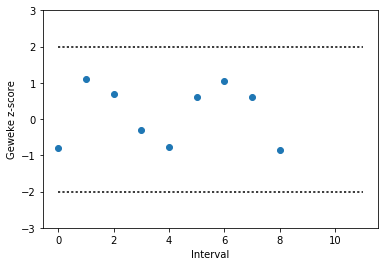

In [17]:
# ** NOTE: Here we are using the trace from the example above where only a single dataset 
# was fit. Of course, to perform the same test when multiple models are fit, just extract 
# a trace for the parameter of interest from a single model fit such as:
# trace_batch['data_obs1']['alpha']

bf.geweke_plot(trace = trace['alpha'], 
                intervals = 10, 
                length = 300)

As can be seen in this example, all z-scores fall within $\pm$ 2 standard deviations from zero suggesting that the null hypothesis that the chain has converged cannot be rejected. The Geweke diagnostic should be repeated for every parameter estimated during the fitting procedure. 

## Plot fitted model

The last thing that we will do is generate a plot based on the model fit to our psychophysical data. To accomplish this, BayesFit offers a function called **plot_cdf** to visualize the model fit:

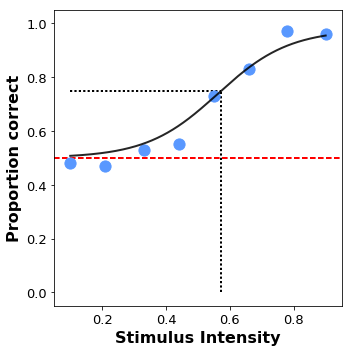

In [18]:
# Next, we use our plotting function and feed it the optional plot we defined above
# along with all other necessary input arguments
bf.plot_cdf(data, metrics, options)

As you can see, our fitted function is very good given our data! Getting parameter estimates for a function fit, along with extracting a estimate of threshold, is likely the primary use most users will employ this module for. The red line inidicates the guess rate defined for the fitted model, and the black dotted lines indicate where the threhold is located on the curve.   

## Conclusion

** THANK YOU FOR USING THE BAYESFIT MODULE!!!.**  

**IF YOU HAVE ANY QUESTIONS OR ISSUES, PLEASE DO NOT HESITATE TO LET ME KNOW.  ALSO, IF YOU FOUND THIS MODULE USEFUL, PLEASE SHOW YOUR APPRECIATION IN WHATEVER WAY YOU CAN. ** 

** KINDEST REGARDS,** 
**-MICHAEL SLUGOCKI-**

## References

[1] Geweke, J., 1991. Evaluating the accuracy of sampling-based approaches to the calculation of posterior moments (Vol. 196). Minneapolis, MN, USA: Federal Reserve Bank of Minneapolis, Research Department.

[2] Sahlin, K., 2011. Estimating convergence of Markov chain Monte Carlo simulations. Stockholm University, Master Thesis.